In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 


from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report

%matplotlib inline

In [32]:
df = pd.read_csv("all/corrected_train.csv")

In [33]:
#Replace numbers with each person's gender
gender_map = {'Female':0,  'Male':1}
df['Gender'] = df.Gender.replace(gender_map)

gender_map = {'female': 0 , 'male':1 }
df['HeadhouseGender'] = df.HeadhouseGender.replace(gender_map)

In [34]:
df = df.drop(columns=['Unnamed: 0', 'idhogar', 'Place', 'Education', 'TypeofHome', 'WallType', 'FloorType', 'RoofType', 'WaterSource',  'Sanitary',
                 'EnergySource', 'RubishDisposalMethod', 'ToiletType', 'WallRate', 'CeilingRate', 'FloorRate', 'dependency', 'TargetCateg'])

In [35]:
df

,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,...,lugar5,lugar6,area1,area2,age,Target,new_hogar_total,new_dependency,HeadhouseGender,Gender
0,0,3,0,1,1,0,0.0,0,1,1,...,0,0,1,0,43,4,1,0.000000,1,1
1,0,4,0,1,1,1,1.0,0,1,1,...,0,0,1,0,67,4,2,1.000000,1,1
2,0,8,0,1,1,0,0.0,0,0,0,...,0,0,1,0,92,4,2,1.000000,0,0
3,0,5,0,1,1,1,1.0,0,2,2,...,0,0,1,0,17,4,4,1.000000,1,1
4,0,5,0,1,1,1,1.0,0,2,2,...,0,0,1,0,37,4,4,1.000000,1,0
5,0,5,0,1,1,1,1.0,0,2,2,...,0,0,1,0,38,4,4,1.000000,1,1
6,0,5,0,1,1,1,1.0,0,2,2,...,0,0,1,0,8,4,4,1.000000,1,0
7,1,2,0,1,1,0,0.0,0,1,1,...,0,0,1,0,7,4,4,1.000000,1,0
8,1,2,0,1,1,0,0.0,0,1,1,...,0,0,1,0,30,4,4,1.000000,1,1
9,1,2,0,1,1,0,0.0,0,1,1,...,0,0,1,0,28,4,4,1.000000,1,0


In [36]:
y = df['Target']
X = df.loc[:, df.columns != 'Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

## Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


print("Metrics on Training Data")
lrtrain_predict = lr.predict(X_train)

print(accuracy_score(y_train, lrtrain_predict))
print(confusion_matrix(y_train, lrtrain_predict))

Metrics on Training Data
0.712834304497236
[[ 156  129   18  195]
 [  62  394   51  535]
 [  29  136   96  546]
 [  27  168   26 4125]]


In [38]:
lr_gs = LogisticRegression()
parameters = {'C':[13,14], 'random_state': [3], 'penalty':['l1','l2']}
lr_gs = GridSearchCV(lr_gs , parameters, cv=4, scoring='f1_weighted', n_jobs=1)
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [13, 14], 'random_state': [3], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [39]:
print(lr_gs.best_params_, lr_gs.best_score_)

{'C': 13, 'penalty': 'l1', 'random_state': 3} 0.6561626389174804


In [40]:
print("Metrics on Training Data")
lrtrain_predict = lr_gs.predict(X_train)
print('The accuracy is {}:\n'.format(accuracy_score(y_train, lrtrain_predict)))
print('The confusion matrix: \n{}'.format(confusion_matrix(y_train, lrtrain_predict)))


print("------------------------------")
print("------------------------------")
print("------------------------------")

print("Metrics on Test Data")
lrtest_pred = lr_gs.predict(X_test)
print('The accuracy is {}: \n'.format(accuracy_score(y_test, lrtest_pred)))
print('The confusion matrix: \n{}'.format(confusion_matrix(y_test,lrtest_pred)))


Metrics on Training Data
The accuracy is 0.7119378455102345:

The confusion matrix: 
[[ 157  130   18  193]
 [  62  391   52  537]
 [  28  138   98  543]
 [  28  170   29 4119]]
------------------------------
------------------------------
------------------------------
Metrics on Test Data
The accuracy is 0.692652329749104: 

The confusion matrix: 
[[  46   48    5   71]
 [  30  117   14  181]
 [   6   49   25  199]
 [   8   59   16 1358]]


## KNN

In [41]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

In [42]:
n_neighbors = range(1,10)
knn_accuracy = list()
knn_recall = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_prediction))
    #knn_recall.append(recall_score(y_test, knn_prediction))
    #precision_score(y_test, y_pred, average='micro')

Text(0.5,1,'KNN Model - Accuracy, Recall vs Neighbors')

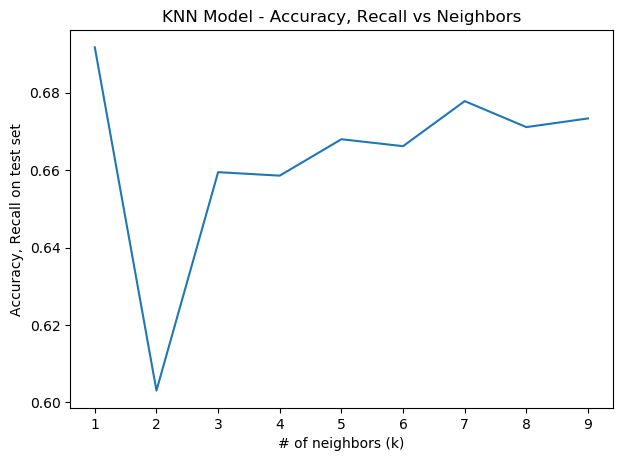

In [43]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(n_neighbors, knn_accuracy)
#plt.plot(n_neighbors, knn_recall)
plt.xlabel('# of neighbors (k)')
plt.ylabel('Accuracy, Recall on test set')
plt.title('KNN Model - Accuracy, Recall vs Neighbors')

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


print("Metrics on Training Data")
train_predict = knn.predict(X_train)
print(metrics.accuracy_score(y_train, train_predict))
print(confusion_matrix(y_train, train_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Metrics on Training Data
0.7815628268340057
[[ 284   53   32  129]
 [  58  576   59  349]
 [  34  108  337  328]
 [  44  155  113 4034]]
------------------------------
------------------------------
Metrics on Test Data
0.668010752688172
[[  63   31   18   58]
 [  35  104   39  164]
 [  14   44   63  158]
 [  22   89   69 1261]]


## Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.2507096966980427
0.24014336917562723


In [46]:
print(classification_report(y_train, nb.predict(X_train)))
print(confusion_matrix(y_train, nb.predict(X_train)))


             precision    recall  f1-score   support

          1       0.30      0.30      0.30       498
          2       0.55      0.05      0.08      1042
          3       0.14      0.92      0.24       807
          4       0.96      0.17      0.29      4346

avg / total       0.75      0.25      0.25      6693

[[ 150    3  338    7]
 [ 129   47  858    8]
 [  51    2  741   13]
 [ 167   34 3405  740]]


In [47]:
print(classification_report(y_test, nb.predict(X_test)))
print(confusion_matrix(y_test, nb.predict(X_test)))

             precision    recall  f1-score   support

          1       0.28      0.28      0.28       170
          2       0.35      0.04      0.07       342
          3       0.14      0.92      0.25       279
          4       0.96      0.15      0.26      1441

avg / total       0.72      0.24      0.23      2232

[[  47    7  115    1]
 [  56   14  272    0]
 [  14    2  256    7]
 [  50   17 1155  219]]


In [48]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier

In [49]:
dt_gs = DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth': [20,21,22,23,24,25], 'max_features': ['auto', 'sqrt'], 'random_state': [3]}
dt_gs = GridSearchCV(dt_gs , parameters, cv=4, scoring='f1_weighted', n_jobs=1)
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20, 21, 22, 23, 24, 25], 'max_features': ['auto', 'sqrt'], 'random_state': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [50]:
print(dt_gs.best_params_, dt_gs.best_score_)

{'criterion': 'entropy', 'max_depth': 22, 'max_features': 'auto', 'random_state': 3} 0.8433950590625295


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(max_depth= 22, criterion = 'entropy' ) #
dt.fit(X_train, y_train)
       
dt_predictions = dt.predict(X_test)

#print(rf.score(X_test, y_test))
scores = cross_val_score(dt, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(metrics.classification_report(y_test, dt_predictions))
print(metrics.confusion_matrix(y_test, dt_predictions))

[0.72767857 0.76286353 0.71300448 0.70627803 0.6988764 ]
Accuracy: 0.72 (+/- 0.05)

             precision    recall  f1-score   support

          1       0.92      0.90      0.91       170
          2       0.92      0.92      0.92       342
          3       0.91      0.90      0.90       279
          4       0.97      0.97      0.97      1441

avg / total       0.95      0.95      0.95      2232

[[ 153    5    3    9]
 [   6  316    0   20]
 [   1    7  250   21]
 [   6   14   23 1398]]


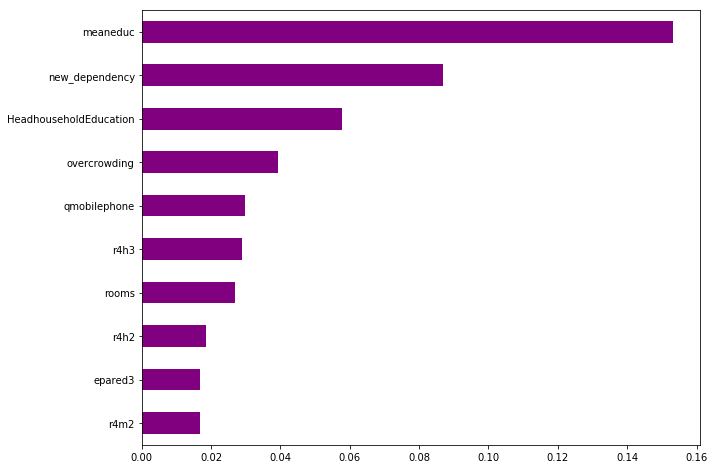

In [52]:
dt_importances = dt.feature_importances_
dt_weights = pd.Series(dt_importances,
                 index=X.columns.values)
dt_weights.sort_values()[-10:].plot(kind = 'barh',color = 'purple',figsize=(10,8))

## Random Forest

In [53]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt

from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV

In [55]:
rfgrid = RandomForestClassifier()
parameters = {'criterion':['gini','entropy'],  'n_estimators': [315,325,400], 'random_state': [4]}
gridrf = GridSearchCV(rfgrid , parameters, cv=3, scoring='f1_weighted')
gridrf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [315, 325, 400], 'random_state': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [56]:
print(gridrf.best_params_, gridrf.best_score_)

{'criterion': 'entropy', 'n_estimators': 315, 'random_state': 4} 0.8964094868679596


In [57]:
rf = RandomForestClassifier(n_estimators = 325, criterion = 'entropy')
rf.fit(X_train, y_train)
       
rf_predictions = rf.predict(X_test)

#print(rf.score(X_test, y_test))
scores = cross_val_score(rf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(mt.classification_report(y_test, rf_predictions))
print(mt.confusion_matrix(y_test, rf_predictions))

[0.79910714 0.82326622 0.79820628 0.81838565 0.79550562]
Accuracy: 0.81 (+/- 0.02)

             precision    recall  f1-score   support

          1       0.98      0.81      0.88       170
          2       0.97      0.90      0.93       342
          3       0.99      0.86      0.92       279
          4       0.93      1.00      0.96      1441

avg / total       0.95      0.95      0.95      2232

[[ 137    4    1   28]
 [   1  307    0   34]
 [   0    0  239   40]
 [   2    4    1 1434]]


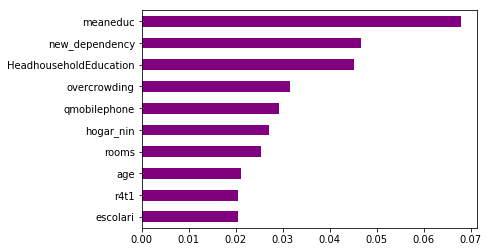

In [58]:
importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh', color = 'purple')

## Multi-layer Perceptron (Neural Networks)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=13, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [62]:
predictions = mlp.predict(X_train)
print(confusion_matrix(y_train, predictions))

[[ 302   55   30  111]
 [  41  682   70  249]
 [  22   73  481  231]
 [  42   89   82 4133]]


In [63]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[  78   31   11   50]
 [  31  183   25  103]
 [   8   44  116  111]
 [  15   51   49 1326]]


In [64]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.59      0.46      0.52       170
          2       0.59      0.54      0.56       342
          3       0.58      0.42      0.48       279
          4       0.83      0.92      0.87      1441

avg / total       0.75      0.76      0.75      2232



In [65]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions, average='micro')
    precision    = precision_score(testing_y, predictions, average='micro')
    #roc_auc      = roc_auc_score(testing_y,predictions, average='micro')
    f1score      = f1_score(testing_y,predictions, average='weighted') 
    #kappa_metric = cohen_kappa_score(testing_y,predictions,)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       #"Area_under_curve": [roc_auc],
                       #"Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(lr, X_train,X_test,y_train,y_test, "Logistic Regression(Baseline_model)")

model2 = model_report(lr_gs,X_train,X_test,y_train,y_test,
                      "Logistic Regression")

model3 = model_report(dt,X_train,X_test,y_train,y_test,
                      "Decision Tree")

model4 = model_report(knn,X_train,X_test,y_train,y_test, 
                      "KNN Classifier")

model5 = model_report(rf,X_train,X_test,y_train,y_test,
                      "Random Forest Classifier")

model6 = model_report(nb,X_train,X_test,y_train,y_test,
                      "Naive Bayes")

model7 = model_report(mlp,X_train,X_test,y_train,y_test,
                      "Neural Networks")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index", axis = 1)

In [66]:
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Logistic Regression(Baseline_model),0.692204,0.692204,0.692204,0.642325
1,Logistic Regression,0.693100,0.693100,0.693100,0.643906
2,Decision Tree,0.952957,0.952957,0.952957,0.952931
3,KNN Classifier,0.806900,0.806900,0.806900,0.798023
4,Random Forest Classifier,0.947133,0.947133,0.947133,0.945981
5,Naive Bayes,0.160394,0.160394,0.160394,0.096167
6,Neural Networks,0.749104,0.749104,0.749104,0.734512


In [68]:
import itertools
import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges): #plt.cm.Oranges
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = (100*cm.astype('float')) / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        thresh = cm.max() / 2.
    return (cm)


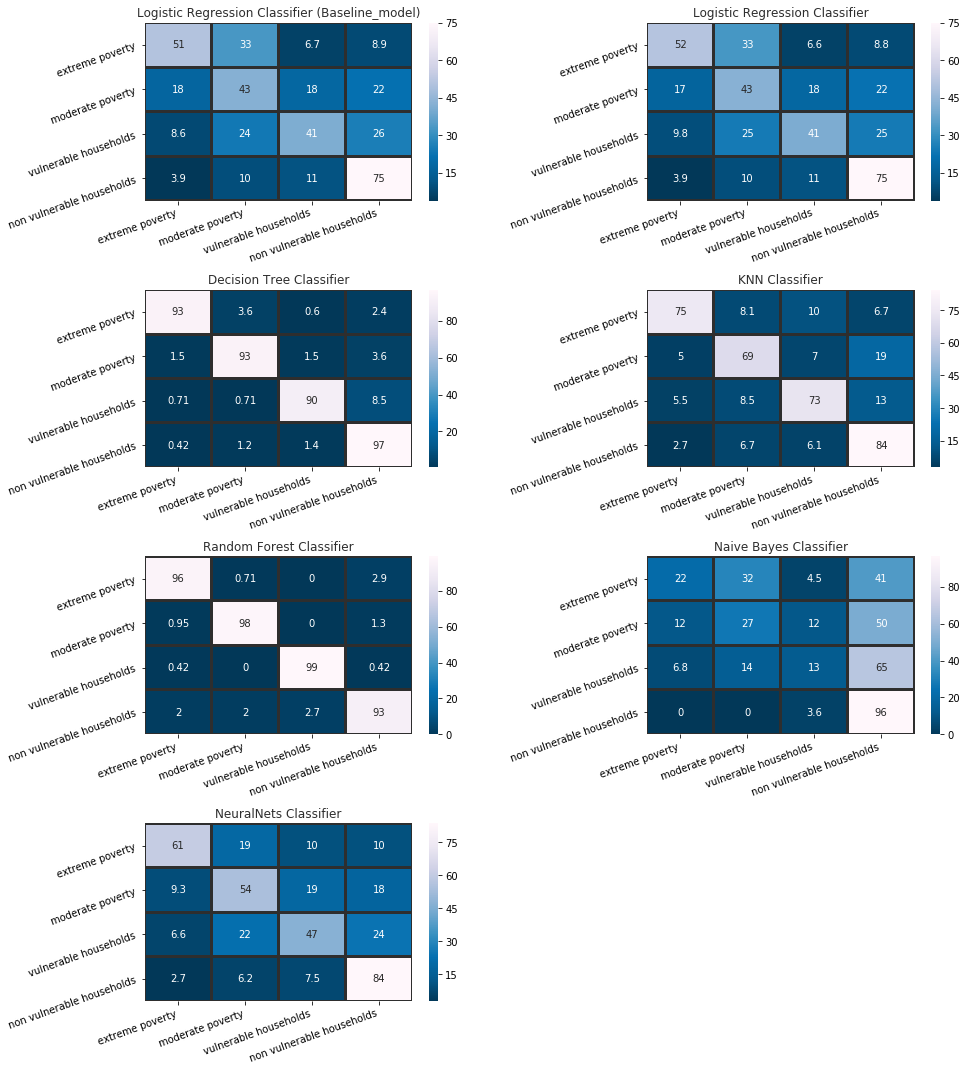

In [75]:
lst    = [lr,lr_gs,dt,knn,rf,nb,mlp]

length = len(lst)

mods   = ['Logistic Regression Classifier (Baseline_model)','Logistic Regression Classifier',
          'Decision Tree Classifier','KNN Classifier','Random Forest Classifier',"Naive Bayes Classifier",
          'NeuralNets Classifier']

fig = plt.figure(figsize=(15,18))


for i,j,k in itertools.zip_longest(lst,range(length), mods) :
    plt.subplot(4,2,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions, y_test)
    dec_matrix = plot_confusion_matrix(conf_matrix, classes=['', '','',''], normalize=True, title='Confusion Matrix')
    sns.heatmap(dec_matrix, annot=True,
                xticklabels=['extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'],
                yticklabels=['extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'],
                linewidths = 2, linecolor = "#2e2e2e",cmap = "PuBu_r")
    plt.subplots_adjust(wspace = .5,hspace = .5)
    plt.xticks(rotation=20, ha="right")
    plt.yticks(rotation=20, ha="right")
    plt.title(k,color = "#2e2e2e")
    